In [23]:
# fix for windows memory leak with MKL
import os
import platform

if platform.system() == "Windows":
    os.environ["OMP_NUM_THREADS"] = "2"

# import libraries
import time
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # this is used for the plot of the graph
from scipy.stats import mode
from scipy.stats import zscore
from scipy.stats import median_abs_deviation
# Sklearn classes
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score, make_scorer, recall_score, f1_score
import sklearn.metrics.cluster as smc
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from helper import (
    draw_confusion_matrix,
    heatmap,
    make_meshgrid,
    plot_contours,
    draw_contour,
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sets random seed for reproducibility
SEED = 42
random.seed(SEED)

In [24]:
# Load Data
data = pd.read_csv("Data_Niki.csv")

# Dropping Unnecessary Rows and Columns
data = data.drop(index=[0,1])
columns_to_drop = ["Dont care", "Visualization", "Visualization.1", "Engineer classification", "Parameter name", "Unnamed: 9"]
param_name = data["Parameter name"]
data = data.drop(columns=columns_to_drop, errors='ignore')

data.head()

C:\Users\nxg15046\AppData\Local\Temp\1\ipykernel_21324\2889359007.py:2: DtypeWarning: Columns (1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

,Engineer classification.1,Tranditional statistics,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,...,Unnamed: 384,Unnamed: 385,Unnamed: 386,Unnamed: 387,Unnamed: 388,Unnamed: 389,Unnamed: 390,Unnamed: 391,Unnamed: 392,Unnamed: 393
2,Need investigation,NaN,0,0,4.04E-02,3.99E-02,4.06E-02,4.05E-02,4.03E-02,4.07E-02,...,6.68E-04,7.79E-04,5.99E-04,6.45E-04,5.29E-04,6.73E-04,4.30E-04,5.00E-04,6.28E-04,4.45E-04
3,Release,35.04718573,-0.02,0.02,1.56E-03,1.49E-03,1.38E-03,1.44E-03,1.38E-03,1.65E-03,...,1.92E-04,1.05E-04,5.28E-05,1.41E-04,1.46E-04,1.42E-04,8.70E-05,5.25E-05,1.02E-04,6.45E-05
4,Release,1758.366676,0.495000005,0.50999999,5.03E-01,5.04E-01,5.02E-01,5.03E-01,5.03E-01,5.02E-01,...,1.04E-03,1.24E-03,1.08E-03,1.19E-03,1.17E-03,1.01E-03,1.54E-03,1.15E-03,1.16E-03,1.27E-03
5,Need investigation (small margin),36.01323248,-0.001,0.003,2.65E-03,2.57E-03,2.64E-03,2.60E-03,2.65E-03,2.59E-03,...,5.60E-05,6.60E-05,7.16E-05,8.95E-05,7.75E-05,6.88E-05,6.33E-05,5.26E-05,6.61E-05,7.53E-05
6,Release,1876.406716,0.986000001,1.014000058,1.00E+00,1.00E+00,1.00E+00,1.00E+00,1.00E+00,1.00E+00,...,2.08E-03,2.28E-03,2.39E-03,2.28E-03,2.14E-03,1.87E-03,2.75E-03,2.08E-03,2.21E-03,2.65E-03


In [25]:
# Relabeling as Release or Investigate (0 or 1)
data['Engineer classification.1'] = (data['Engineer classification.1'] == 'Release').astype(int)

# Converting from String to Numerical
data = data.apply(pd.to_numeric, errors='coerce') 

# Addressing Null Values
data.replace('NaN', np.nan, inplace=True)
data.replace('#N/A', np.nan, inplace=True)
data.replace('#NAME?', np.nan, inplace=True)
data.fillna(data.median(numeric_only=True), inplace=True)

data

,Engineer classification.1,Tranditional statistics,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,...,Unnamed: 384,Unnamed: 385,Unnamed: 386,Unnamed: 387,Unnamed: 388,Unnamed: 389,Unnamed: 390,Unnamed: 391,Unnamed: 392,Unnamed: 393
2,0,295.068070,0.000000,0.000000,0.040400,0.039900,0.040600,0.040500,0.040300,0.040700,...,6.680000e-04,7.790000e-04,5.990000e-04,6.450000e-04,5.290000e-04,6.730000e-04,4.300000e-04,5.000000e-04,6.280000e-04,4.450000e-04
3,1,35.047186,-0.020000,0.020000,0.001560,0.001490,0.001380,0.001440,0.001380,0.001650,...,1.920000e-04,1.050000e-04,5.280000e-05,1.410000e-04,1.460000e-04,1.420000e-04,8.700000e-05,5.250000e-05,1.020000e-04,6.450000e-05
4,1,1758.366676,0.495000,0.510000,0.503000,0.504000,0.502000,0.503000,0.503000,0.502000,...,1.040000e-03,1.240000e-03,1.080000e-03,1.190000e-03,1.170000e-03,1.010000e-03,1.540000e-03,1.150000e-03,1.160000e-03,1.270000e-03
5,0,36.013232,-0.001000,0.003000,0.002650,0.002570,0.002640,0.002600,0.002650,0.002590,...,5.600000e-05,6.600000e-05,7.160000e-05,8.950000e-05,7.750000e-05,6.880000e-05,6.330000e-05,5.260000e-05,6.610000e-05,7.530000e-05
6,1,1876.406716,0.986000,1.014000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.080000e-03,2.280000e-03,2.390000e-03,2.280000e-03,2.140000e-03,1.870000e-03,2.750000e-03,2.080000e-03,2.210000e-03,2.650000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,0,797.814384,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,2.510000e-08,2.320000e-08,2.000000e-08,1.930000e-08,2.310000e-08,1.710000e-08,3.150000e-08,2.290000e-08,1.860000e-08,2.350000e-08
2669,0,798.409110,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,1.880000e-08,1.960000e-08,2.200000e-08,6.540000e-08,2.200000e-08,2.600000e-08,4.710000e-08,1.880000e-08,1.900000e-08,2.290000e-08
2670,0,5325.581463,0.895500,0.904500,0.900000,0.899000,0.900000,0.899000,0.899000,0.900000,...,1.050000e-03,1.160000e-03,1.190000e-03,1.100000e-03,1.200000e-03,1.260000e-03,2.330000e-03,1.110000e-03,1.250000e-03,1.290000e-03
2671,0,7492.838062,0.895500,0.904500,0.901000,0.899000,0.900000,0.899000,0.900000,0.900000,...,1.210000e-03,1.200000e-03,1.160000e-03,5.580000e-03,1.210000e-03,1.030000e-03,5.390000e-03,1.280000e-03,1.050000e-03,1.240000e-03


In [26]:
# Obtaining Data with Purely Median and Std (nothing else)

columns_to_drop = ['Engineer classification.1', 'Tranditional statistics'] # removed Unnamed: 7, Unnamed: 8
y = data['Engineer classification.1']
traditional_stat = data['Tranditional statistics']
# lower_lim = data['Unnamed: 7']
# upper_lim = data['Unnamed: 8']
only_med_std = data.drop(columns=columns_to_drop, axis=1)
only_med_std

,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,...,Unnamed: 384,Unnamed: 385,Unnamed: 386,Unnamed: 387,Unnamed: 388,Unnamed: 389,Unnamed: 390,Unnamed: 391,Unnamed: 392,Unnamed: 393
2,0.000000,0.000000,0.040400,0.039900,0.040600,0.040500,0.040300,0.040700,0.040100,0.040200,...,6.680000e-04,7.790000e-04,5.990000e-04,6.450000e-04,5.290000e-04,6.730000e-04,4.300000e-04,5.000000e-04,6.280000e-04,4.450000e-04
3,-0.020000,0.020000,0.001560,0.001490,0.001380,0.001440,0.001380,0.001650,0.001850,0.001460,...,1.920000e-04,1.050000e-04,5.280000e-05,1.410000e-04,1.460000e-04,1.420000e-04,8.700000e-05,5.250000e-05,1.020000e-04,6.450000e-05
4,0.495000,0.510000,0.503000,0.504000,0.502000,0.503000,0.503000,0.502000,0.503000,0.502000,...,1.040000e-03,1.240000e-03,1.080000e-03,1.190000e-03,1.170000e-03,1.010000e-03,1.540000e-03,1.150000e-03,1.160000e-03,1.270000e-03
5,-0.001000,0.003000,0.002650,0.002570,0.002640,0.002600,0.002650,0.002590,0.002640,0.002650,...,5.600000e-05,6.600000e-05,7.160000e-05,8.950000e-05,7.750000e-05,6.880000e-05,6.330000e-05,5.260000e-05,6.610000e-05,7.530000e-05
6,0.986000,1.014000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.080000e-03,2.280000e-03,2.390000e-03,2.280000e-03,2.140000e-03,1.870000e-03,2.750000e-03,2.080000e-03,2.210000e-03,2.650000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,2.510000e-08,2.320000e-08,2.000000e-08,1.930000e-08,2.310000e-08,1.710000e-08,3.150000e-08,2.290000e-08,1.860000e-08,2.350000e-08
2669,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,1.880000e-08,1.960000e-08,2.200000e-08,6.540000e-08,2.200000e-08,2.600000e-08,4.710000e-08,1.880000e-08,1.900000e-08,2.290000e-08
2670,0.895500,0.904500,0.900000,0.899000,0.900000,0.899000,0.899000,0.900000,0.900000,0.900000,...,1.050000e-03,1.160000e-03,1.190000e-03,1.100000e-03,1.200000e-03,1.260000e-03,2.330000e-03,1.110000e-03,1.250000e-03,1.290000e-03
2671,0.895500,0.904500,0.901000,0.899000,0.900000,0.899000,0.900000,0.900000,0.899000,0.900000,...,1.210000e-03,1.200000e-03,1.160000e-03,5.580000e-03,1.210000e-03,1.030000e-03,5.390000e-03,1.280000e-03,1.050000e-03,1.240000e-03


In [27]:
# Feature Augmentation

## Z-score for each median and standard deviation
### index 0 is the first column for median 
### index 191 is the last column for median
### index 192 is the first column for standard deviation
### index 385 is the last column for standard deviation

# Extracting Median and Standard Deviation
med = only_med_std.iloc[:, 0:194] # originally 0:192
std = only_med_std.iloc[:, 194:388] # originally 192:386

# Standardizing by Row
z_med = med.apply(zscore, axis=1)
z_med = pd.DataFrame(z_med.tolist(), index=med.index, columns=med.columns)
z_std = std.apply(zscore, axis=1)
z_std = pd.DataFrame(z_std.tolist(), index=std.index, columns=std.columns)

# Range (need to remove lower and upper limit)
z_med_min = z_med.iloc[:, 2:388].min(axis=1)
z_std_min = z_std.iloc[:, 2:388].min(axis=1)
z_med_max = z_med.iloc[:, 2:388].max(axis=1)
z_std_max = z_std.iloc[:, 2:388].max(axis=1)
z_med_range = z_med_max - z_med_min
z_std_range = z_std_max - z_std_min

## Inter-Quartile Range
Q1_med = z_med.quantile(0.25, axis=1)
Q3_med = z_med.quantile(0.75, axis=1)
z_med_iqr = Q3_med - Q1_med
Q1_std = z_std.quantile(0.25, axis=1)
Q3_std = z_med.quantile(0.75, axis=1)
z_std_iqr = Q3_std - Q1_std

## Median Absolute Deviation
z_med_mad = z_med.apply(median_abs_deviation, axis=1)
z_std_mad = z_std.apply(median_abs_deviation, axis=1)

## Skewness
med_skewness = med.skew(axis=1)
std_skewness = std.skew(axis=1)

## Kurtosis (Propensity for Outliers)
med_kurtosis = med.kurt(axis=1)
std_kurtosis = std.kurt(axis=1)

## Normalized Upper / Lower Bound
z_limit_med = z_med.iloc[:, 1] - z_med.iloc[:, 0]

## Range Divided by Bound
z_med_range_to_bound = z_med_range / z_limit_med

## IQR Divided by Bound
z_med_iqr_to_bound = z_med_iqr / z_limit_med

## The following variables were eliminated due to low correlation
"""
## Range vs IQR Ratio
eps = 1e-9
med_range_iqr_ratio = z_med_range / (z_med_iqr + eps)

## Experimental Feature
z_med_max = z_med.max(axis=1)
z_std_max = z_std.max(axis=1)
experimental = z_med_max * z_std_max

## Coefficient of Variation
eps = 1e-6
coeff_var = std / (med.abs() + eps) # avoid division by 0
mean_coeff_var = coeff_var.mean(axis=1)
"""

'\n## Range vs IQR Ratio\neps = 1e-9\nmed_range_iqr_ratio = z_med_range / (z_med_iqr + eps)\n\n## Experimental Feature\nz_med_max = z_med.max(axis=1)\nz_std_max = z_std.max(axis=1)\nexperimental = z_med_max * z_std_max\n\n## Coefficient of Variation\neps = 1e-6\ncoeff_var = std / (med.abs() + eps) # avoid division by 0\nmean_coeff_var = coeff_var.mean(axis=1)\n'

In [28]:
x = pd.concat([z_med_range, z_std_range, z_med_iqr, z_std_iqr, z_med_mad, z_std_mad, med_skewness, std_skewness, med_kurtosis, std_kurtosis, param_name, y], axis=1)

# Assigning New Column Names to Bypass Column Name Repeating Issue
num_columns = x.shape[1]
x.columns = x.columns.astype(str)
new_columns = ["z_med_range", "z_std_range", "z_med_iqr", "z_std_iqr", "z_med_mad", "z_std_mad", "med_skewness", "std_skewness", "med_kurtosis", "std_kurtosis", "param_name", "y"]
x.columns = new_columns

corr_matrix = x.corr(numeric_only=True)
print(corr_matrix["y"].sort_values(ascending=False))
x = x.drop('y', axis=1)

y               1.000000
med_skewness    0.247892
z_med_iqr       0.171369
z_med_mad       0.145245
z_std_iqr       0.083065
std_kurtosis   -0.073561
std_skewness   -0.133288
z_std_range    -0.187253
z_std_mad      -0.220055
z_med_range    -0.350551
med_kurtosis   -0.501368
Name: y, dtype: float64


In [29]:
# Replace inf/-inf with NaN
x.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clip extreme values in numerical columns
lower_cap = -1e10
upper_cap = 1e10
numerical_features = x.select_dtypes(include=["number"]).columns.tolist()
x[numerical_features] = x[numerical_features].clip(lower=lower_cap, upper=upper_cap)

# Train Test Split
train_raw, test_raw, target, target_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

# Applying Pipeline to Train and Test Data
categorical_features = x.select_dtypes(exclude=["number"]).columns.tolist()
numerical_features = x.select_dtypes(include=["number"]).columns.tolist()
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("normalizer", StandardScaler())])
full_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features), ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])

train = full_pipeline.fit_transform(train_raw)
test = full_pipeline.transform(test_raw)

In [30]:
# Decision Tree Classifier

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score, pos_label=0)
clf_parameters = [{"max_depth": [2,4,8,16,32,64], "min_samples_split": [2,4,8,16], "criterion": ['gini', 'entropy']}]
clf = DecisionTreeClassifier(class_weight='balanced')
grid = GridSearchCV(clf, clf_parameters, cv = kf, scoring=f1_scorer)
grid.fit(train,target)
clf_res = pd.DataFrame(grid.cv_results_)
clf_predicted = grid.predict(test)
best_params_dt = grid.best_params_
relevant_columns = ['rank_test_score', 'mean_test_score', 'std_test_score']
top_3_models = clf_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print(top_3_models)

    rank_test_score  mean_test_score  std_test_score
9                 1         0.807181        0.035160
44                2         0.804988        0.040152
10                3         0.804867        0.033015


In [31]:
# KNN

knn_parameters = [{"n_neighbors": [2,4,8,16,32],
                   "weights": ['uniform', 'distance']}]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_parameters, cv = kf, scoring = f1_scorer)
grid.fit(train, target)
knn_res = pd.DataFrame(grid.cv_results_)
knn_predicted = grid.predict(test)
best_params_knn = grid.best_params_
relevant_columns = ['rank_test_score', 'mean_test_score', 'std_test_score']
top_3_knn = knn_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print(top_3_knn)

   rank_test_score  mean_test_score  std_test_score
0                1         0.821055        0.035674
1                2         0.816296        0.029508
2                3         0.806556        0.019715


In [32]:
# XGBoost

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 10],
    "learning_rate": [0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [5, 6],
    "gamma": [0, 1, 5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=kf, scoring=f1_scorer, n_jobs=-1, verbose=1)
xgb_grid.fit(train, target)
xgb_res = pd.DataFrame(xgb_grid.cv_results_)
best_params_xgb = xgb_grid.best_params_
relevant_columns = ['rank_test_score', 'mean_test_score', 'std_test_score']

top_3_xgb = xgb_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print("\nTop 3 XGBoost Models:")
print(top_3_xgb)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\nxg15046\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:35:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 3 XGBoost Models:
    rank_test_score  mean_test_score  std_test_score
20                1         0.861959        0.003889
88                2         0.861729        0.012461
86                3         0.861337        0.012366


In [33]:
# LightGBM

lgbm_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [-1, 8, 16],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 50, 100],
    "min_child_samples": [10, 20, 30],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [5, 6],
}

lgbm = LGBMClassifier(random_state=42)
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=kf, scoring="accuracy", n_jobs=-1, verbose=1)
lgbm_grid.fit(train, target)
lgbm_res = pd.DataFrame(lgbm_grid.cv_results_)
best_params_lgbm = lgbm_grid.best_params_
relevant_columns = ['rank_test_score', 'mean_test_score', 'std_test_score']

top_3_lgbm = lgbm_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print("\nTop 3 LightGBM Models:")
print(top_3_lgbm)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[LightGBM] [Info] Number of positive: 1584, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.847512 -> initscore=1.715219
[LightGBM] [Info] Start training from score 1.715219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [34]:
# Random Forest

rf_params = {
    "n_estimators": [200, 300],
    "max_depth": [None, 16, 32],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid.fit(train, target)
rf_res = pd.DataFrame(rf_grid.cv_results_)
best_params_rf = rf_grid.best_params_
relevant_columns = ['rank_test_score', 'mean_test_score', 'std_test_score']

top_3_rf = rf_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print("\nTop 3 Random Forest Models:")
print(top_3_rf)
print("\nBest Random Forest Parameters:", rf_grid.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits

Top 3 Random Forest Models:
   rank_test_score  mean_test_score  std_test_score
0                1         0.957731        0.008726
2                2         0.956661        0.006553
1                3         0.956126        0.007900

Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
# SVM

svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3]
}

svm = SVC(random_state=42, class_weight='balanced')
svm_grid = GridSearchCV(svm, svm_params, cv=kf, scoring="accuracy", n_jobs=-1, verbose=1)
svm_grid.fit(train, target)
svm_res = pd.DataFrame(svm_grid.cv_results_)
best_params_svm = svm_grid.best_params_
relevant_columns = ['rank_test_score', 'param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'std_test_score'
                    , 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time']

top_3_svm = svm_res[relevant_columns].sort_values(by='rank_test_score').head(3)
print("\nTop 3 SVM Models:")
print(top_3_svm)
print("\nBest SVM Parameters:", svm_grid.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits

Top 3 SVM Models:
    rank_test_score  param_C param_gamma param_kernel  mean_test_score  \
84                1    100.0       scale          rbf         0.939540   
72                1    100.0       scale          rbf         0.939540   
48                3     10.0       scale          rbf         0.939005   

    std_test_score  mean_fit_time  std_fit_time  mean_score_time  \
84        0.011892       0.161844      0.010219         0.040842   
72        0.011892       0.155595      0.015576         0.043647   
48        0.011649       0.157709      0.015586         0.045861   

    std_score_time  
84        0.001007  
72        0.003702  
48        0.002591  

Best SVM Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


Fit Time:    0.031271 seconds
Prediction Time: 0.002291 seconds
Test Accuracy: 0.938903
Precision:   0.787402
Recall:      0.819672
F1 Score:    0.803213


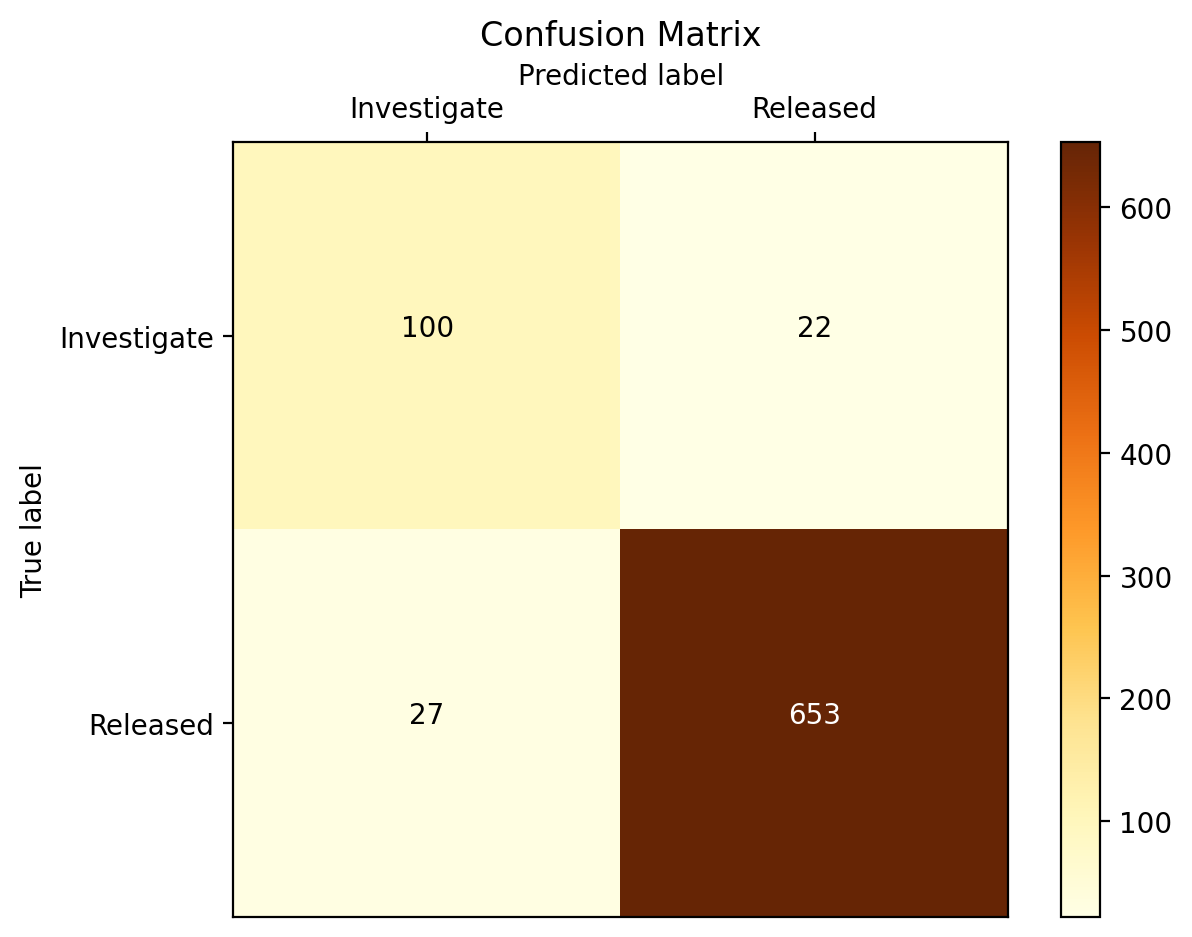

In [36]:
# Best Decision Tree

# Measure fit time
start_fit = time.time()
dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = dt.predict(test)
dt_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

dt_metrics = ['Decision Tree', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

Fit Time:    0.001881 seconds
Prediction Time: 0.077999 seconds
Test Accuracy: 0.937656
Precision:   0.743243
Recall:      0.901639
F1 Score:    0.814815


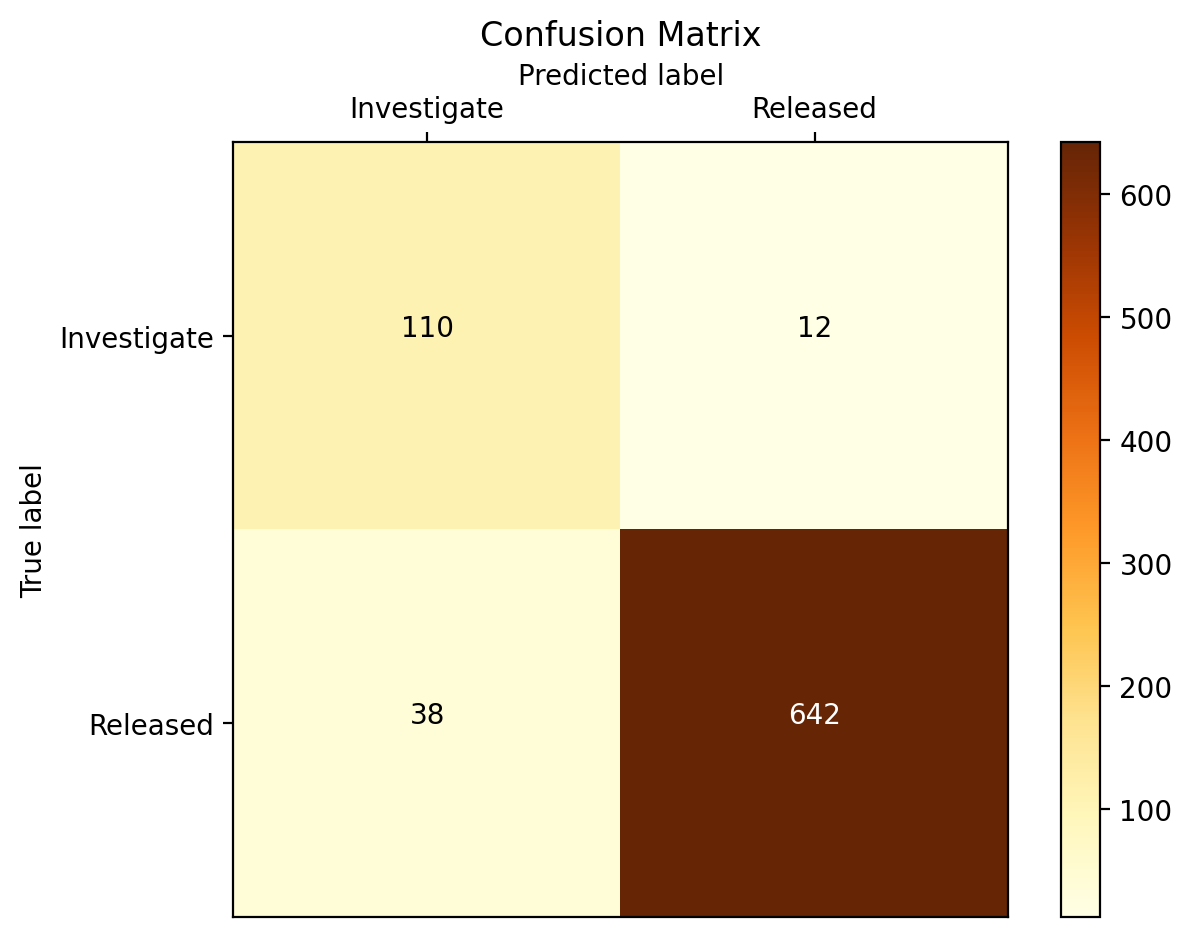

In [37]:
# Best KNN

# Measure fit time
start_fit = time.time()
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = knn.predict(test)
knn_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

knn_metrics = ['KNN', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

Fit Time:    0.679105 seconds
Prediction Time: 0.005029 seconds
Test Accuracy: 0.968828
Precision:   0.907563
Recall:      0.885246
F1 Score:    0.896266


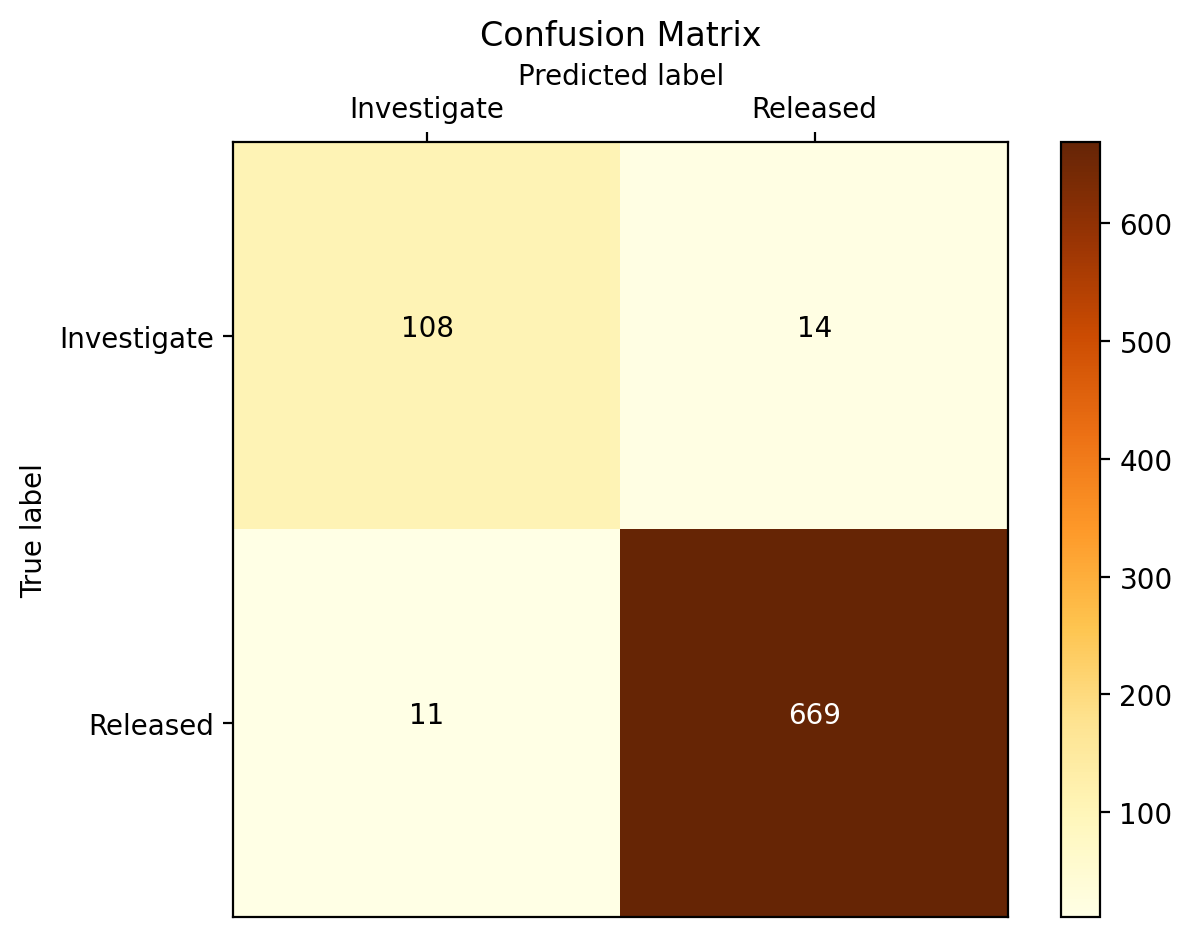

In [38]:
# Best XGBoost

# Measure fit time
start_fit = time.time()
xgb = XGBClassifier(**best_params_xgb, random_state=42)
xgb.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = xgb.predict(test)
xgb_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

xgb_metrics = ['XGBoost', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

[LightGBM] [Info] Number of positive: 1584, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.847512 -> initscore=1.715219
[LightGBM] [Info] Start training from score 1.715219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\nxg15046\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


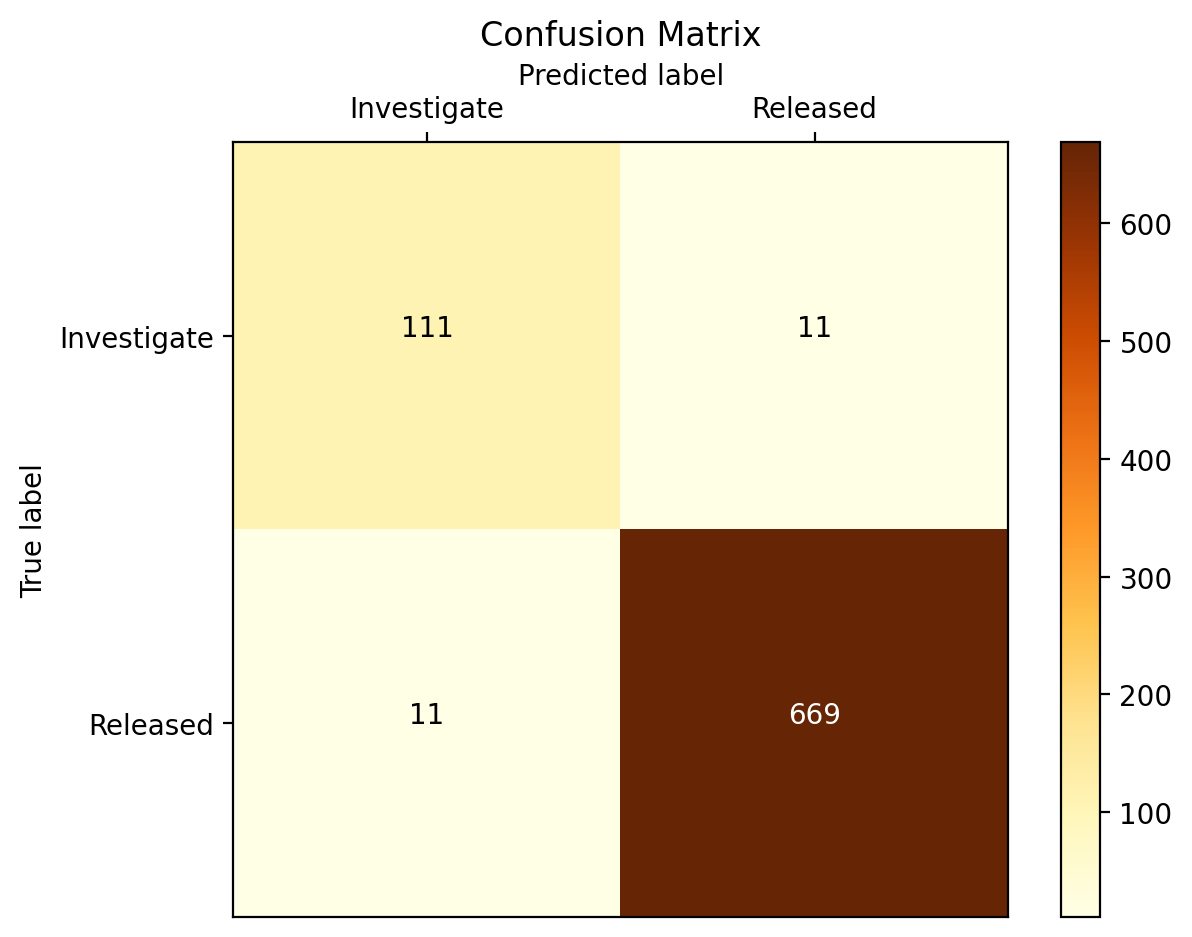

Best LightGBM Parameters:
colsample_bytree: 0.8
learning_rate: 0.1
max_depth: 16
min_child_samples: 20
n_estimators: 300
num_leaves: 50
scale_pos_weight: 5


In [45]:
# Best LightGBM

# Measure fit time
start_fit = time.time()
lgbm = LGBMClassifier(**best_params_lgbm, random_state=42)
lgbm.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = lgbm.predict(test)
lgbm_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

lgbm_metrics = ['LightGBM', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

# Print Best Parameters
print("Best LightGBM Parameters:")
for param, value in best_params_lgbm.items():
    print(f"{param}: {value}")


Fit Time:    0.902974 seconds
Prediction Time: 0.027891 seconds
Test Accuracy: 0.946384
Precision:   0.862385
Recall:      0.770492
F1 Score:    0.813853


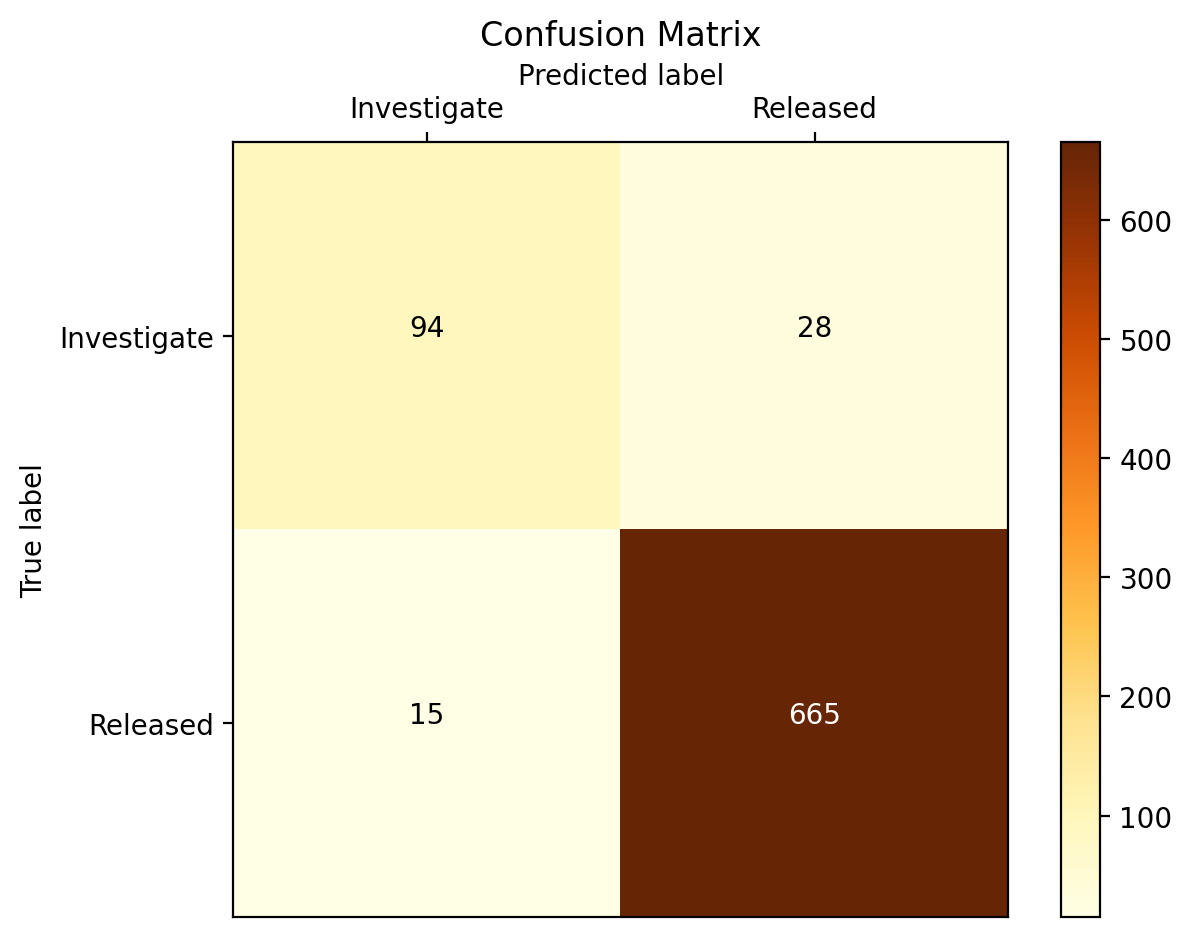

In [40]:
# Best Random Forest

# Measure fit time
start_fit = time.time()
rf = RandomForestClassifier(**best_params_rf, random_state=42)
rf.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = rf.predict(test)
rf_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

rf_metrics = ['Random Forest', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

Fit Time:    0.148154 seconds
Prediction Time: 0.019897 seconds
Test Accuracy: 0.937656
Precision:   0.781250
Recall:      0.819672
F1 Score:    0.800000


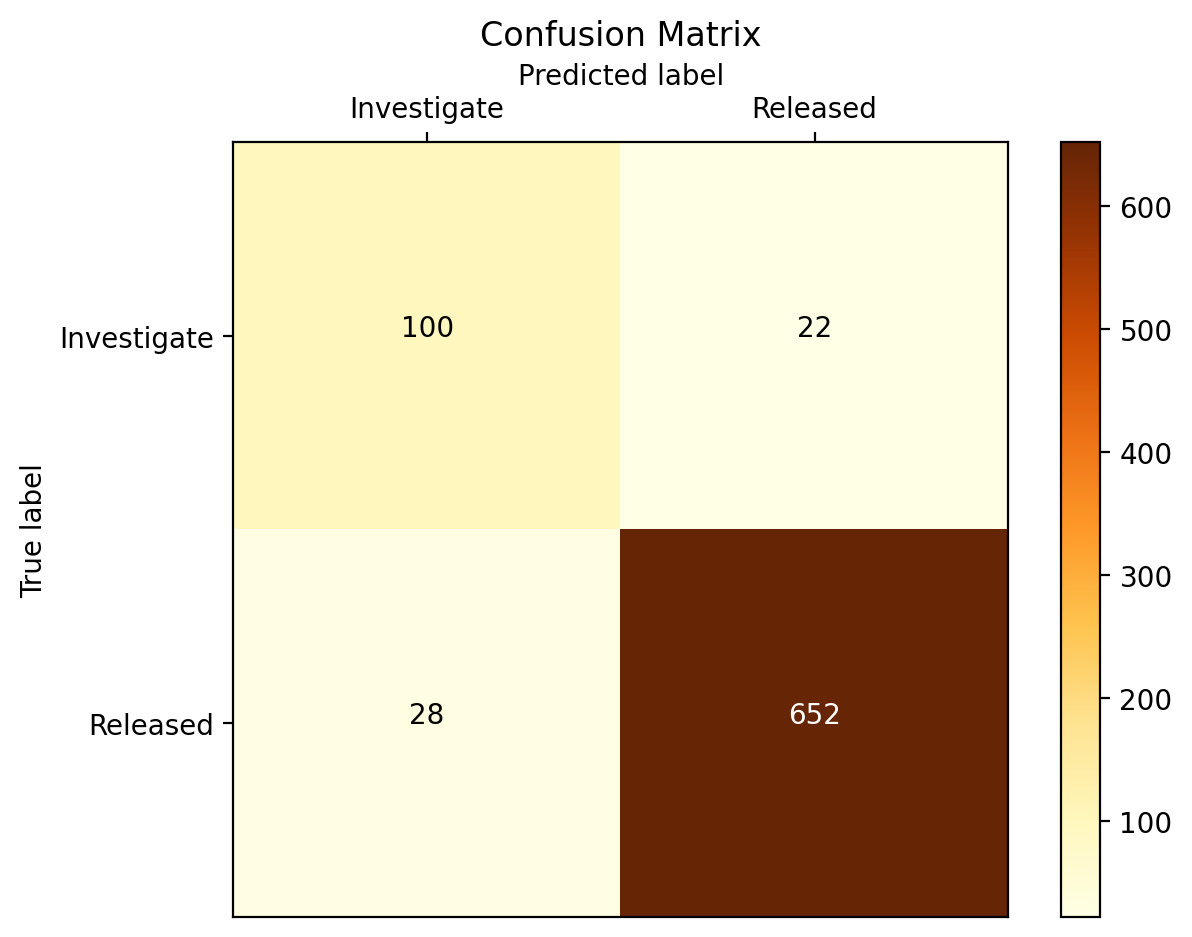

In [41]:
# Best SVM

# Measure fit time
start_fit = time.time()
svm = SVC(**best_params_svm, random_state=42)
svm.fit(train, target)
end_fit = time.time()
fit_time = end_fit - start_fit

# Measure prediction time
start_pred = time.time()
predicted = svm.predict(test)
svm_results = predicted
end_pred = time.time()
pred_time = end_pred - start_pred

# Metrics
accuracy = metrics.accuracy_score(target_test, predicted)
precision = precision_score(target_test, predicted, pos_label=0)
recall = recall_score(target_test, predicted, pos_label=0)
f1 = f1_score(target_test, predicted, pos_label=0)

# Print Results
print("%-12s %f seconds" % ('Fit Time:', fit_time))
print("%-12s %f seconds" % ('Prediction Time:', pred_time))
print("%-12s %f" % ('Test Accuracy:', accuracy))
print("%-12s %f" % ('Precision:', precision))
print("%-12s %f" % ('Recall:', recall))
print("%-12s %f" % ('F1 Score:', f1))

svm_metrics = ['SVM', accuracy, precision, recall, f1, fit_time, pred_time]
draw_confusion_matrix(target_test, predicted, ['Investigate', 'Released'])

In [42]:
# Summary Table of Misclassifications
## 1 is Release
## 0 is Investigate

df = pd.DataFrame({
    'XGBoost': xgb_results,
    'LightGBM': lgbm_results,
    'KNN': knn_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    "SVM": svm_results,
    "Niki Eval": target_test
})

# Only Output Parameters with Incorrect Output
misclassified_summary = df[(df.drop(columns='Niki Eval').ne(df['Niki Eval'], axis=0)).any(axis=1)]
misclassified_summary.index = misclassified_summary.index + 2
print("Summary of Misclassifications:")
print(misclassified_summary.sort_index())
print(misclassified_summary.shape)
misclassified_summary = misclassified_summary.sort_index()

# Exporting Misclassified Entries
misclassified_summary.to_excel("misclassified_summary.xlsx", index=True, engine='xlsxwriter')
print("The misclassified summary has been exported to 'misclassified_summary.csv'.")


Summary of Misclassifications:
      XGBoost  LightGBM  KNN  Decision Tree  Random Forest  SVM  Niki Eval
4           0         0    0              1              0    0          0
5           1         1    1              0              1    1          1
13          0         0    0              0              0    0          1
27          0         0    0              1              0    0          0
74          1         0    0              1              1    1          0
...       ...       ...  ...            ...            ...  ...        ...
2534        0         0    0              0              1    0          0
2539        0         0    0              0              1    0          0
2540        1         1    0              0              1    1          1
2667        0         0    1              0              0    0          1
2673        1         1    1              1              1    0          0

[95 rows x 7 columns]
(95, 7)
The misclassified summary has been exp

Ensemble Accuracy: 0.9638403990024937


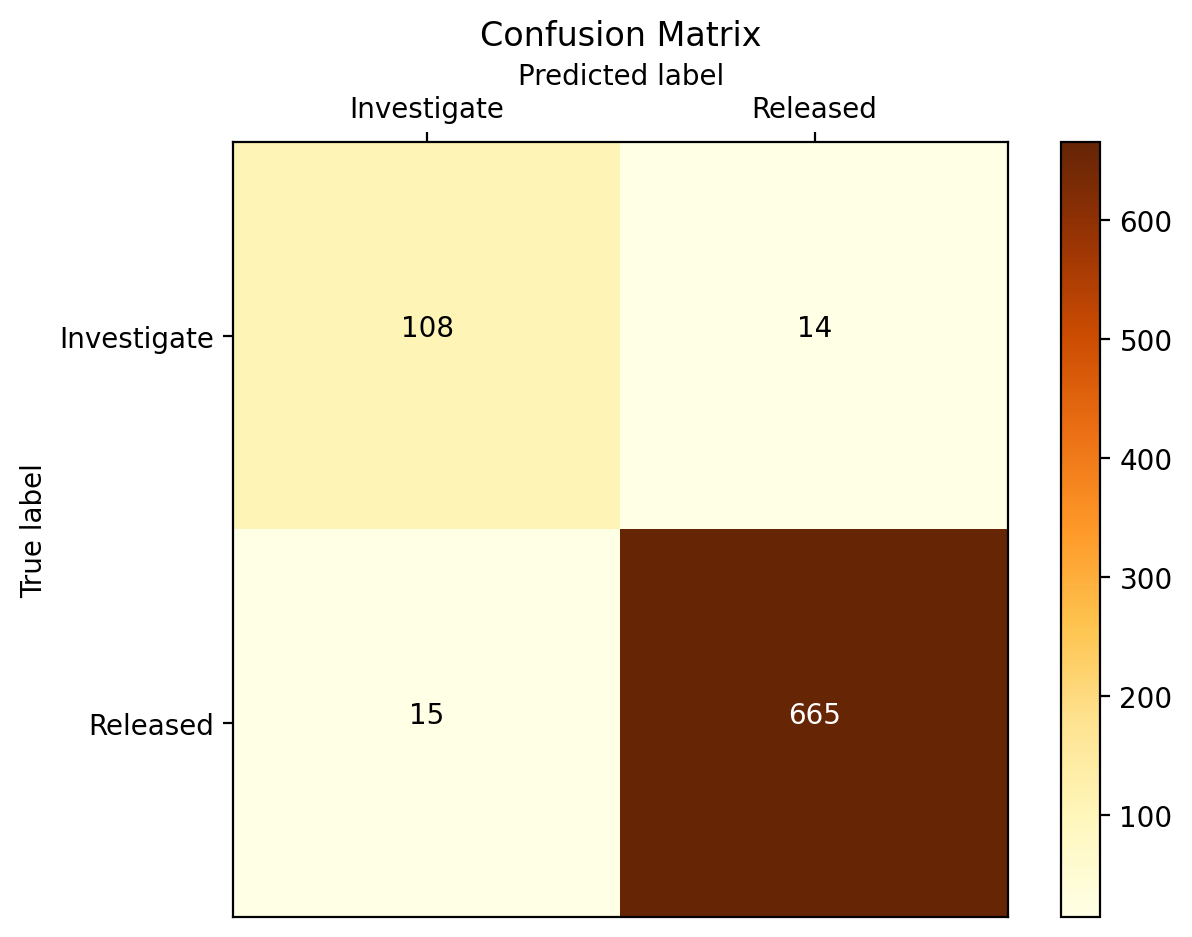

In [43]:
# Stack all prediction arrays
all_preds = np.vstack([
    xgb_results,
    lgbm_results,
    svm_results,
    rf_results,
    dt_results,
])

# Compute row-wise mode to get majority vote
ensemble_results, _ = mode(all_preds, axis=0, keepdims=False)

# Convert to 1D array if needed
ensemble_results = ensemble_results.flatten()

# Evaluate ensemble
print("Ensemble Accuracy:", metrics.accuracy_score(target_test, ensemble_results))
draw_confusion_matrix(target_test, ensemble_results, ['Investigate', 'Released'])


In [44]:
# Summary Table of All Metrics

all_metrics = [dt_metrics, rf_metrics, xgb_metrics, lgbm_metrics, svm_metrics]

# Create a DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fit Time (s)', 'Prediction Time (s)'
])

# Print the table
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
print(metrics_df.to_string(index=False))


        Model  Accuracy  Precision   Recall  F1 Score  Fit Time (s)  Prediction Time (s)
     LightGBM  0.972569   0.909836 0.909836  0.909836      0.262938             0.011042
      XGBoost  0.968828   0.907563 0.885246  0.896266      0.679105             0.005029
Random Forest  0.946384   0.862385 0.770492  0.813853      0.902974             0.027891
Decision Tree  0.938903   0.787402 0.819672  0.803213      0.031271             0.002291
          SVM  0.937656   0.781250 0.819672  0.800000      0.148154             0.019897
